In [ ]:
import pandas as pd
import numpy as np
from tensorflow import keras


In [ ]:
!pip install keras==2.12.0

  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0.post1 requires keras<2.16,>=2.15.0, but you have keras 2.12.0 which is incompatible.


In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
from tensorflow import keras
# from tensorflow.keras import layers
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils



In [ ]:
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
random_seed = 7
np.random.seed(random_seed)

In [ ]:
df=pd.read_csv('Iris.csv')

# Data Pre-Processing

In [ ]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Finding null values with sum

In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df.shape

(150, 6)

In [ ]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
df.describe(include=None)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

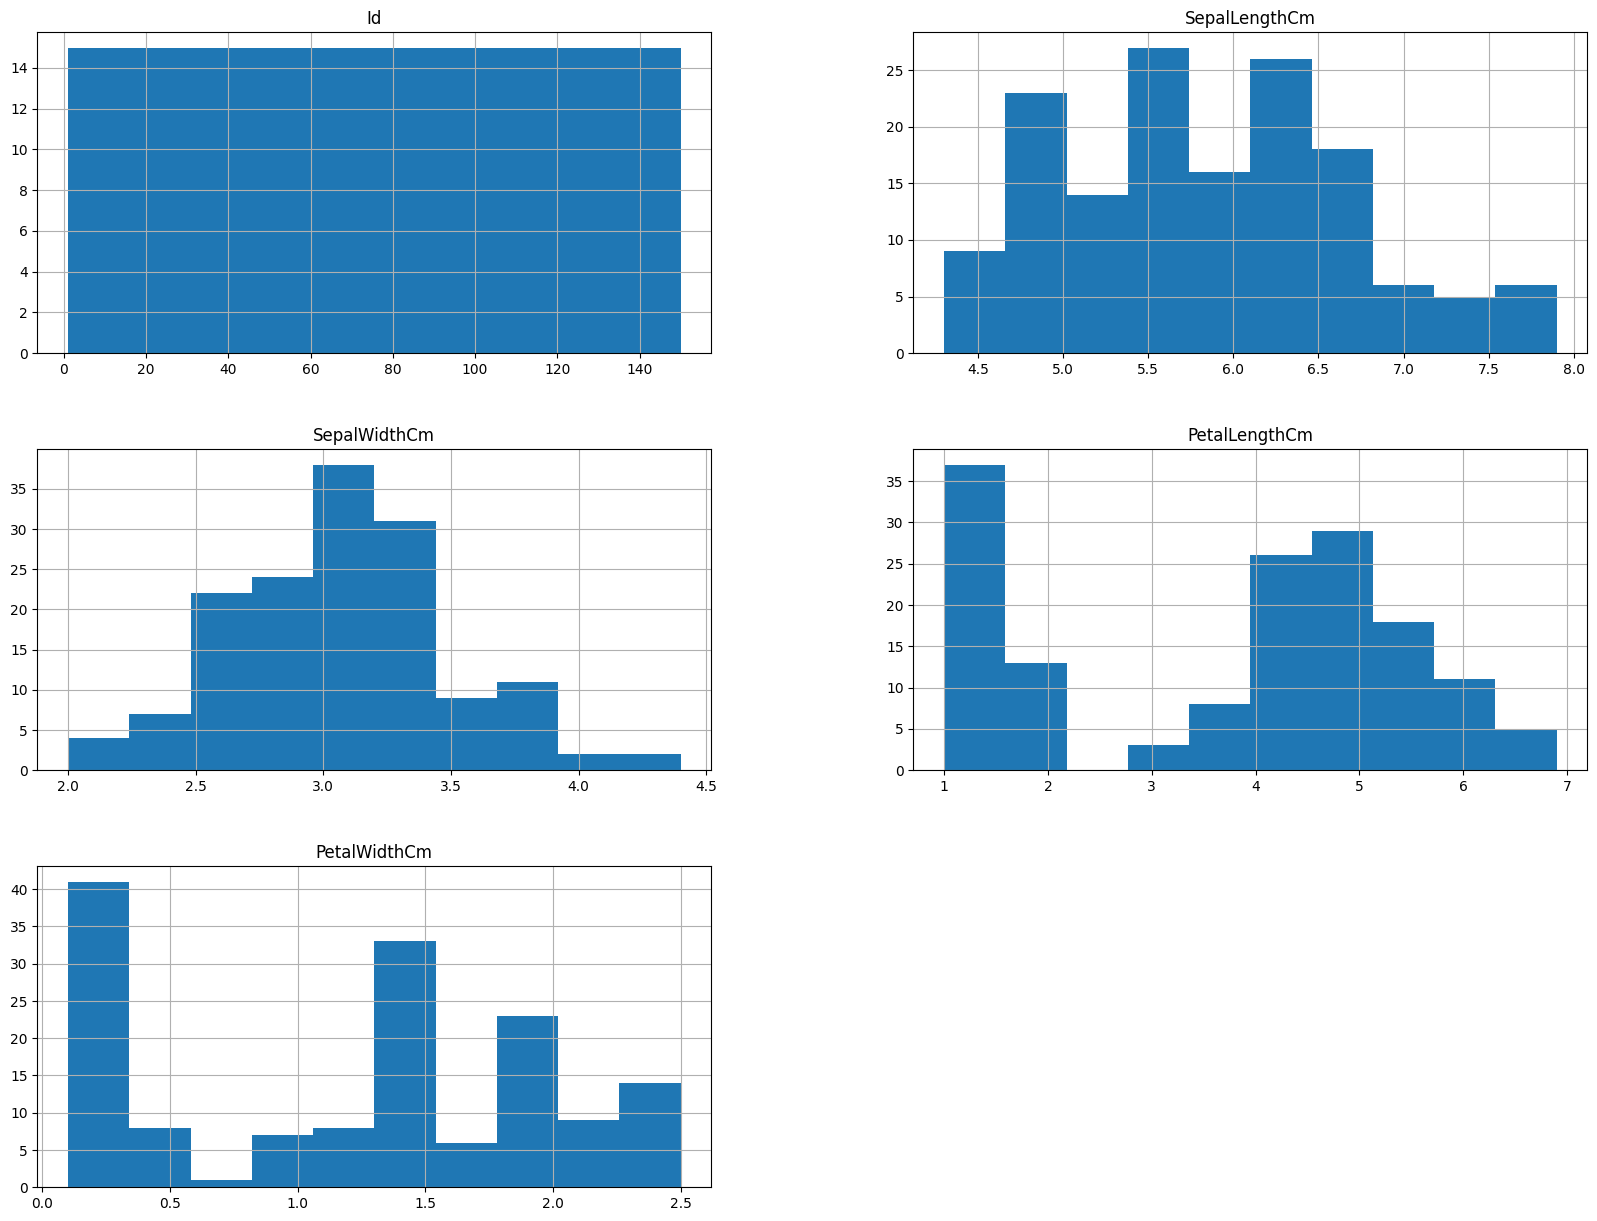

In [ ]:
df.hist(figsize=(20,15))
plt.show()

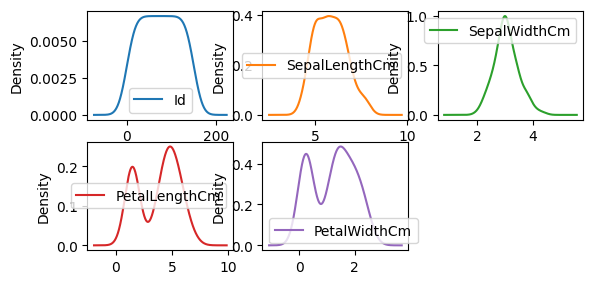

In [ ]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, legend=True)
plt.show()

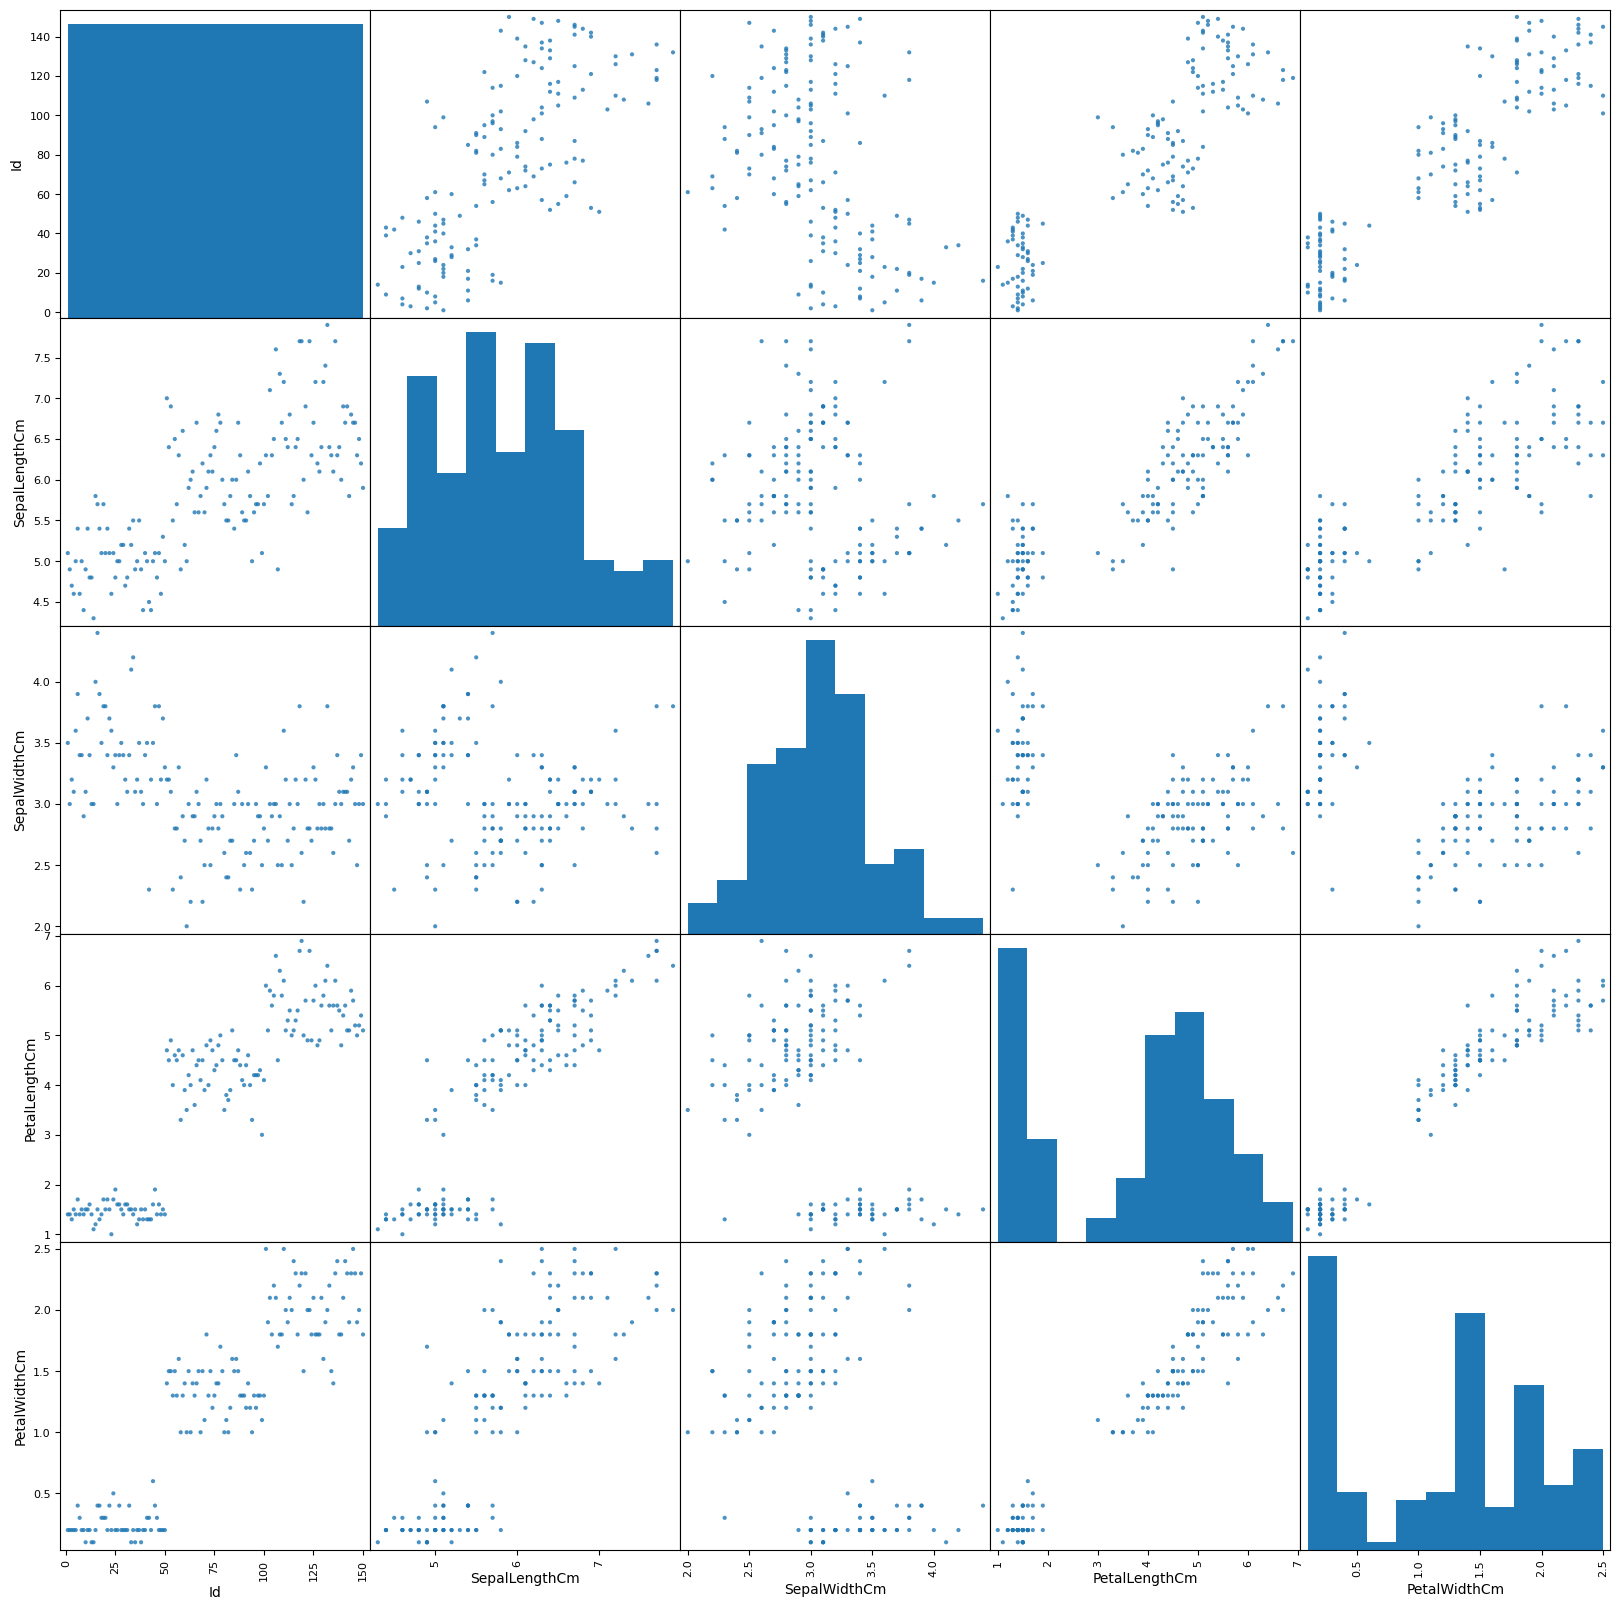

In [ ]:
#scatter plot matrix
scatter_matrix(df, alpha=0.8, figsize=(20,20))
plt.show()

# Seprate Dataset

In [ ]:
array=df.values

In [ ]:
X=array[:,1:5]

In [ ]:
Y=array[:,5]

# Split Data

In [ ]:
test_size=0.33

In [ ]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=test_size,random_state=random_seed)

# Encode

In [ ]:
encode_train=LabelEncoder()
encode_train.fit(Y_train)
encode_Y_train=encode_train.transform(Y_train)

In [ ]:
one_hot_Y_train =  np_utils.to_categorical(encode_Y_train)

In [ ]:
encode_test=LabelEncoder()
encode_test.fit(Y_test)
encode_Y_test=encode_test.transform(Y_test)

In [ ]:
one_hot_Y_test = np_utils.to_categorical(encode_Y_test)

# Building a MLP (Fully Connected NN)

In [ ]:
pip install tensorflow --upgrade

  Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
def baseline_model():
  # create model
  model = Sequential()
  model.add(Dense(6, input_dim=4, activation='relu'))
  model.add(Dense(3, activation='softmax'))
  # Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model


In [ ]:
model=baseline_model()

# Model Training

In [ ]:
# Converting X_train vlaues from object to float32
import numpy as np
X_train = X_train.astype(np.float32)

In [ ]:
model.fit(X_train, one_hot_Y_train, epochs=150, batch_size=10)

Epoch 1/150
10/10 [==============================] - 2s 9ms/step - loss: 1.9376 - accuracy: 0.3100
Epoch 2/150
10/10 [==============================] - 0s 4ms/step - loss: 1.8695 - accuracy: 0.3100
Epoch 3/150
10/10 [==============================] - 0s 4ms/step - loss: 1.8070 - accuracy: 0.3200
Epoch 4/150
10/10 [==============================] - 0s 3ms/step - loss: 1.7509 - accuracy: 0.3200
Epoch 5/150
10/10 [==============================] - 0s 3ms/step - loss: 1.6970 - accuracy: 0.3200
Epoch 6/150
10/10 [==============================] - 0s 4ms/step - loss: 1.6442 - accuracy: 0.3200
Epoch 7/150
10/10 [==============================] - 0s 4ms/step - loss: 1.5941 - accuracy: 0.3200
Epoch 8/150
10/10 [==============================] - 0s 4ms/step - loss: 1.5489 - accuracy: 0.3200
Epoch 9/150
10/10 [==============================] - 0s 4ms/step - loss: 1.5039 - accuracy: 0.3400
Epoch 10/150
10/10 [==============================] - 0s 3ms/step - loss: 1.4593 - accuracy: 0.3400
Epoch 11/

# Evaluation

In [ ]:
# !pip install scikeras
# !pip install tensorflow



In [ ]:
from scikeras.wrappers import KerasClassifier

In [ ]:
evaluator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5)


In [ ]:
kfold=KFold(n_splits=10, shuffle=True, random_state=random_seed)


In [ ]:
results=cross_val_score(evaluator, X_test, one_hot_Y_test, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100,results.std()*100))


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/200
9/9 [==============================] - 2s 3ms/step - loss: 3.0550 - accuracy: 0.3111
Epoch 2/200
9/9 [==============================] - 0s 2ms/step - loss: 2.8375 - accuracy: 0.2667
Epoch 3/200
9/9 [==============================] - 0s 2ms/step - loss: 2.6044 - accuracy: 0.2444
Epoch 4/200
9/9 [==============================] - 0s 3ms/step - loss: 2.4331 - accuracy: 0.0667
Epoch 5/200
9/9 [==============================] - 0s 2ms/step - loss: 2.2998 - accuracy: 0.0222
Epoch 6/200
9/9 [==============================] - 0s 2ms/step - loss: 2.1579 - accuracy: 0.0222
Epoch 7/200
9/9 [==============================] - 0s 2ms/step - loss: 2.0736 - accuracy: 0.0000e+00
Epoch 8/200
9/9 [==============================] - 0s 3ms/step - loss: 1.9661 - accuracy: 0.0000e+00
Epoch 9/200
9/9 [==============================] - 0s 3ms/step - loss: 1.8772 - accuracy: 0.0222
Epoch 10/200
9/9 [==============================] - 0s 3ms/step - loss: 1.7911 - accuracy: 0.1111
Epoch 11/200
9/9 [===

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/200
9/9 [==============================] - 1s 5ms/step - loss: 1.1971 - accuracy: 0.2444
Epoch 2/200
9/9 [==============================] - 0s 4ms/step - loss: 1.1593 - accuracy: 0.2000
Epoch 3/200
9/9 [==============================] - 0s 4ms/step - loss: 1.1339 - accuracy: 0.2222
Epoch 4/200
9/9 [==============================] - 0s 5ms/step - loss: 1.1190 - accuracy: 0.2000
Epoch 5/200
9/9 [==============================] - 0s 5ms/step - loss: 1.1003 - accuracy: 0.2444
Epoch 6/200
9/9 [==============================] - 0s 4ms/step - loss: 1.0867 - accuracy: 0.2444
Epoch 7/200
9/9 [==============================] - 0s 4ms/step - loss: 1.0780 - accuracy: 0.2667
Epoch 8/200
9/9 [==============================] - 0s 5ms/step - loss: 1.0697 - accuracy: 0.3333
Epoch 9/200
9/9 [==============================] - 0s 6ms/step - loss: 1.0578 - accuracy: 0.3778
Epoch 10/200
9/9 [==============================] - 0s 12ms/step - loss: 1.0501 - accuracy: 0.3778
Epoch 11/200
9/9 [==========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/200
9/9 [==============================] - 2s 5ms/step - loss: 1.6478 - accuracy: 0.2667
Epoch 2/200
9/9 [==============================] - 0s 6ms/step - loss: 1.5275 - accuracy: 0.2667
Epoch 3/200
9/9 [==============================] - 0s 7ms/step - loss: 1.4262 - accuracy: 0.2667
Epoch 4/200
9/9 [==============================] - 0s 6ms/step - loss: 1.3467 - accuracy: 0.2667
Epoch 5/200
9/9 [==============================] - 0s 6ms/step - loss: 1.2820 - accuracy: 0.2667
Epoch 6/200
9/9 [==============================] - 0s 7ms/step - loss: 1.2346 - accuracy: 0.2667
Epoch 7/200
9/9 [==============================] - 0s 5ms/step - loss: 1.1989 - accuracy: 0.2667
Epoch 8/200
9/9 [==============================] - 0s 4ms/step - loss: 1.1579 - accuracy: 0.2667
Epoch 9/200
9/9 [==============================] - 0s 4ms/step - loss: 1.1288 - accuracy: 0.2667
Epoch 10/200
9/9 [==============================] - 0s 5ms/step - loss: 1.0956 - accuracy: 0.2889
Epoch 11/200
9/9 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


9/9 [==============================] - 1s 4ms/step - loss: 3.1600 - accuracy: 0.2667
Epoch 2/200
9/9 [==============================] - 0s 3ms/step - loss: 2.7368 - accuracy: 0.2667
Epoch 3/200
9/9 [==============================] - 0s 3ms/step - loss: 2.3491 - accuracy: 0.2667
Epoch 4/200
9/9 [==============================] - 0s 3ms/step - loss: 1.9868 - accuracy: 0.2667
Epoch 5/200
9/9 [==============================] - 0s 3ms/step - loss: 1.7548 - accuracy: 0.2000
Epoch 6/200
9/9 [==============================] - 0s 2ms/step - loss: 1.5524 - accuracy: 0.0000e+00
Epoch 7/200
9/9 [==============================] - 0s 2ms/step - loss: 1.4252 - accuracy: 0.0000e+00
Epoch 8/200
9/9 [==============================] - 0s 3ms/step - loss: 1.3336 - accuracy: 0.0000e+00
Epoch 9/200
9/9 [==============================] - 0s 2ms/step - loss: 1.2790 - accuracy: 0.1778
Epoch 10/200
9/9 [==============================] - 0s 3ms/step - loss: 1.2348 - accuracy: 0.3333
Epoch 11/200
9/9 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


9/9 [==============================] - 1s 3ms/step - loss: 2.0195 - accuracy: 0.0000e+00
Epoch 2/200
9/9 [==============================] - 0s 3ms/step - loss: 1.9001 - accuracy: 0.0000e+00
Epoch 3/200
9/9 [==============================] - 0s 3ms/step - loss: 1.7921 - accuracy: 0.0000e+00
Epoch 4/200
9/9 [==============================] - 0s 3ms/step - loss: 1.6775 - accuracy: 0.0000e+00
Epoch 5/200
9/9 [==============================] - 0s 3ms/step - loss: 1.5630 - accuracy: 0.0000e+00
Epoch 6/200
9/9 [==============================] - 0s 3ms/step - loss: 1.4181 - accuracy: 0.0667
Epoch 7/200
9/9 [==============================] - 0s 3ms/step - loss: 1.3064 - accuracy: 0.3333
Epoch 8/200
9/9 [==============================] - 0s 4ms/step - loss: 1.2001 - accuracy: 0.3556
Epoch 9/200
9/9 [==============================] - 0s 3ms/step - loss: 1.1277 - accuracy: 0.3778
Epoch 10/200
9/9 [==============================] - 0s 3ms/step - loss: 1.0771 - accuracy: 0.4444
Epoch 11/200
9/9 [===

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


9/9 [==============================] - 1s 5ms/step - loss: 1.3336 - accuracy: 0.3556
Epoch 2/200
9/9 [==============================] - 0s 4ms/step - loss: 1.3165 - accuracy: 0.3778
Epoch 3/200
9/9 [==============================] - 0s 6ms/step - loss: 1.3077 - accuracy: 0.3778
Epoch 4/200
9/9 [==============================] - 0s 5ms/step - loss: 1.2948 - accuracy: 0.3778
Epoch 5/200
9/9 [==============================] - 0s 4ms/step - loss: 1.2851 - accuracy: 0.3778
Epoch 6/200
9/9 [==============================] - 0s 5ms/step - loss: 1.2763 - accuracy: 0.3778
Epoch 7/200
9/9 [==============================] - 0s 4ms/step - loss: 1.2672 - accuracy: 0.3778
Epoch 8/200
9/9 [==============================] - 0s 5ms/step - loss: 1.2591 - accuracy: 0.3333
Epoch 9/200
9/9 [==============================] - 0s 3ms/step - loss: 1.2504 - accuracy: 0.3333
Epoch 10/200
9/9 [==============================] - 0s 3ms/step - loss: 1.2407 - accuracy: 0.3333
Epoch 11/200
9/9 [=======================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


9/9 [==============================] - 1s 3ms/step - loss: 3.8238 - accuracy: 0.2889
Epoch 2/200
9/9 [==============================] - 0s 3ms/step - loss: 3.6921 - accuracy: 0.2889
Epoch 3/200
9/9 [==============================] - 0s 3ms/step - loss: 3.5656 - accuracy: 0.2889
Epoch 4/200
9/9 [==============================] - 0s 2ms/step - loss: 3.4336 - accuracy: 0.2889
Epoch 5/200
9/9 [==============================] - 0s 3ms/step - loss: 3.3359 - accuracy: 0.2889
Epoch 6/200
9/9 [==============================] - 0s 3ms/step - loss: 3.2264 - accuracy: 0.2889
Epoch 7/200
9/9 [==============================] - 0s 2ms/step - loss: 3.1289 - accuracy: 0.2889
Epoch 8/200
9/9 [==============================] - 0s 4ms/step - loss: 3.0357 - accuracy: 0.2889
Epoch 9/200
9/9 [==============================] - 0s 3ms/step - loss: 2.9548 - accuracy: 0.2889
Epoch 10/200
9/9 [==============================] - 0s 3ms/step - loss: 2.8643 - accuracy: 0.2889
Epoch 11/200
9/9 [=======================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


9/9 [==============================] - 1s 3ms/step - loss: 2.3692 - accuracy: 0.0000e+00
Epoch 2/200
9/9 [==============================] - 0s 3ms/step - loss: 2.2122 - accuracy: 0.0000e+00
Epoch 3/200
9/9 [==============================] - 0s 4ms/step - loss: 2.0453 - accuracy: 0.0000e+00
Epoch 4/200
9/9 [==============================] - 0s 3ms/step - loss: 1.8900 - accuracy: 0.0000e+00
Epoch 5/200
9/9 [==============================] - 0s 3ms/step - loss: 1.7411 - accuracy: 0.0000e+00
Epoch 6/200
9/9 [==============================] - 0s 3ms/step - loss: 1.6087 - accuracy: 0.0000e+00
Epoch 7/200
9/9 [==============================] - 0s 3ms/step - loss: 1.4748 - accuracy: 0.0000e+00
Epoch 8/200
9/9 [==============================] - 0s 3ms/step - loss: 1.3690 - accuracy: 0.0000e+00
Epoch 9/200
9/9 [==============================] - 0s 3ms/step - loss: 1.2522 - accuracy: 0.0222
Epoch 10/200
9/9 [==============================] - 0s 4ms/step - loss: 1.1737 - accuracy: 0.1111
Epoch 11/

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/200
9/9 [==============================] - 1s 5ms/step - loss: 2.6237 - accuracy: 0.3778
Epoch 2/200
9/9 [==============================] - 0s 4ms/step - loss: 2.4481 - accuracy: 0.3778
Epoch 3/200
9/9 [==============================] - 0s 4ms/step - loss: 2.3207 - accuracy: 0.3778
Epoch 4/200
9/9 [==============================] - 0s 5ms/step - loss: 2.1779 - accuracy: 0.3778
Epoch 5/200
9/9 [==============================] - 0s 4ms/step - loss: 2.0729 - accuracy: 0.3778
Epoch 6/200
9/9 [==============================] - 0s 3ms/step - loss: 1.9717 - accuracy: 0.3778
Epoch 7/200
9/9 [==============================] - 0s 4ms/step - loss: 1.8794 - accuracy: 0.3778
Epoch 8/200
9/9 [==============================] - 0s 4ms/step - loss: 1.7934 - accuracy: 0.3778
Epoch 9/200
9/9 [==============================] - 0s 4ms/step - loss: 1.7083 - accuracy: 0.3778
Epoch 10/200
9/9 [==============================] - 0s 4ms/step - loss: 1.6292 - accuracy: 0.3778
Epoch 11/200
9/9 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


9/9 [==============================] - 1s 3ms/step - loss: 7.0684 - accuracy: 0.2889
Epoch 2/200
9/9 [==============================] - 0s 3ms/step - loss: 6.6535 - accuracy: 0.2889
Epoch 3/200
9/9 [==============================] - 0s 3ms/step - loss: 6.2494 - accuracy: 0.2889
Epoch 4/200
9/9 [==============================] - 0s 3ms/step - loss: 5.8597 - accuracy: 0.2889
Epoch 5/200
9/9 [==============================] - 0s 3ms/step - loss: 5.4878 - accuracy: 0.2889
Epoch 6/200
9/9 [==============================] - 0s 3ms/step - loss: 5.1157 - accuracy: 0.2889
Epoch 7/200
9/9 [==============================] - 0s 4ms/step - loss: 4.7610 - accuracy: 0.2889
Epoch 8/200
9/9 [==============================] - 0s 3ms/step - loss: 4.3846 - accuracy: 0.2889
Epoch 9/200
9/9 [==============================] - 0s 4ms/step - loss: 4.0136 - accuracy: 0.2889
Epoch 10/200
9/9 [==============================] - 0s 4ms/step - loss: 3.6446 - accuracy: 0.2889
Epoch 11/200
9/9 [=======================

In [ ]:
X_test = X_test.astype('float32')  # Convert to float32 or float64 depending on your requirements
scores = model.evaluate(X_test, one_hot_Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))


2/2 [==============================] - 0s 10ms/step - loss: 0.2073 - accuracy: 0.9600

accuracy: 96.00%
